# Digital Image Processing

## Assignment 4

### Vedansh Agrawal
### 2021112010

### Task 1: Image Segmentation Using Thresholding

- 1.1 In this we need to apply the three different thresholding techniques.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gray_image = cv2.imread('../images/ein.jpeg', cv2.IMREAD_GRAYSCALE)

_, binary_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

adaptive_thresh = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

_, otsu_thresh = cv2.threshold(
    gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

cv2.imwrite('../images/ein_binary.jpeg', binary_thresh)
cv2.imwrite('../images/ein_adaptive.jpeg', adaptive_thresh)
cv2.imwrite('../images/ein_otsu.jpeg', otsu_thresh)

True

- 1.2 Now we need to plot the original image and the processed image side by side

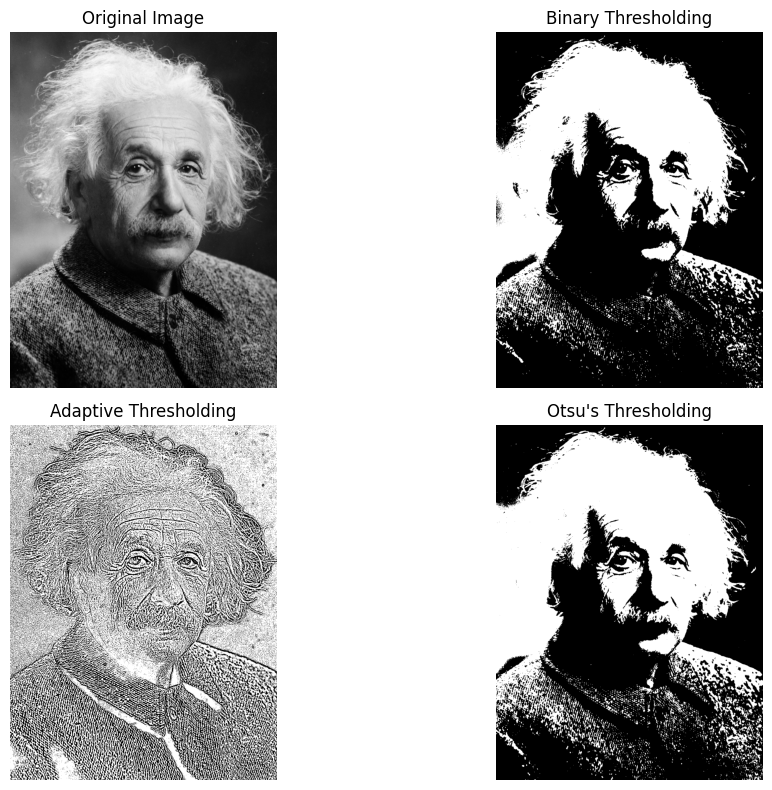

In [3]:
titles = ["Original Image", "Binary Thresholding", "Adaptive Thresholding", "Otsu's Thresholding"]
images = [gray_image, binary_thresh, adaptive_thresh, otsu_thresh]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

- 1.3 

1. Binary Thresholding (top-right): While not directly visible here, it applies a fixed global threshold, which may fail to adapt to varying intensities.
2. Adaptive Thresholding (bottom-left): This method segments the image based on local intensity variations. It struggles with high-frequency texture, leading to a noisy output with less clear boundaries.
3. Otsu's Thresholding (bottom-right): Automatically determines the optimal threshold for segmentation. This method provides a clear separation between foreground and background, making it the most effective in this case for identifying Einstein's silhouette and facial features with minimal noise.

Best Method: Otsu's Thresholding performs the best here, as it provides well-defined object boundaries with minimal noise compared to the adaptive method.

### Task 2: Line Detection Using Hough Transform

- 2.1 we need to write a function which detects lines using hough transform

In [4]:
def line_detection(image, thresh=200):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=thresh)
    line_image = np.copy(image)

    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return line_image

- 2.2 Now let us apply the above function to a image and plot the original and the processed image.

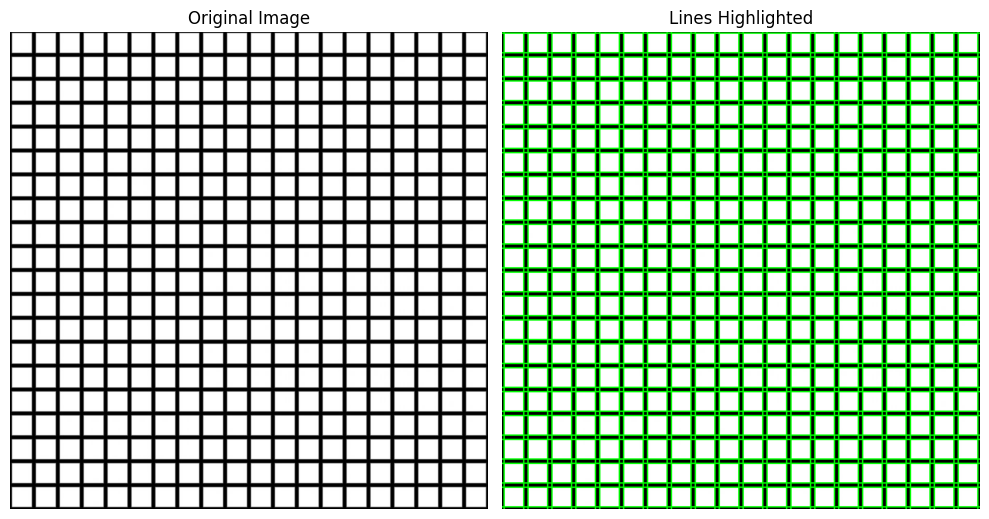

True

In [5]:
org_image = cv2.imread('../images/grid.png')
line_image = line_detection(org_image)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title("Lines Highlighted")
plt.axis("off")

plt.tight_layout()
plt.show()

cv2.imwrite('../images/line_grid.png', line_image)

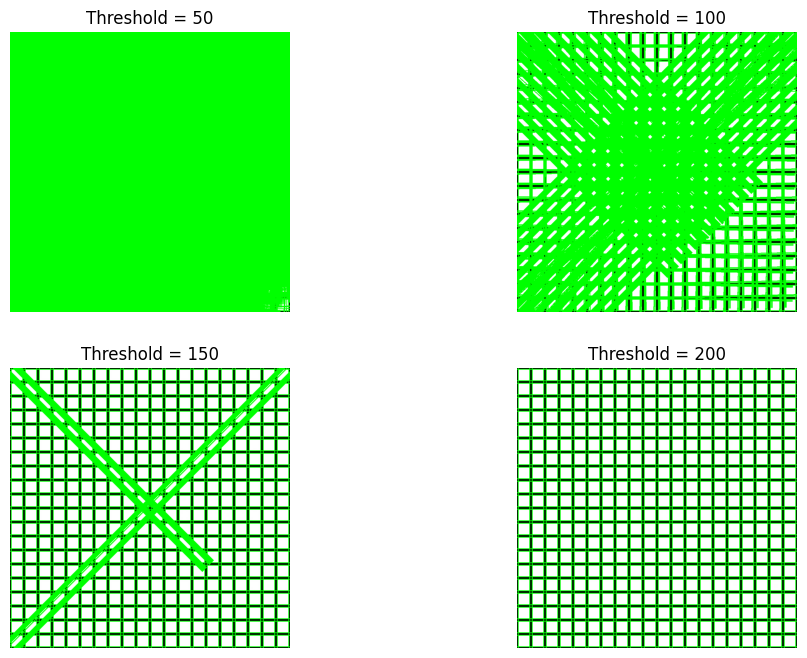

In [6]:
thresh = [50, 100, 150, 200]

plt.figure(figsize=(12, 8))
for i, t in enumerate(thresh):
    line_image = line_detection(org_image, thresh=t)
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Threshold = {t}')
    plt.axis('off')

As we can see, with smaller thresholds, the detector detecs too many unnecsseary lines, but with the correct value, it detects the perfect lines.

### Task 3: Circle Detection Using Hough Circle Transform

- 3.1 Let us write a function which helps us detect the circles in an image.

In [12]:
def detect_circles(image, dp=1.0, min_dist=50, param1=100, param2=100, min_radius=0, max_radius=0):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=dp,
        minDist=min_dist,
        param1=param1,
        param2=param2,
        minRadius=min_radius,
        maxRadius=max_radius
    )

    output_image = np.copy(image)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])  
            radius = circle[2]             
            cv2.circle(output_image, center, radius, (0, 255, 0), 2)
            cv2.circle(output_image, center, 2, (0, 0, 255), 3)

    return output_image

- 3.2 Now we need to apply this to an image with coins in it.

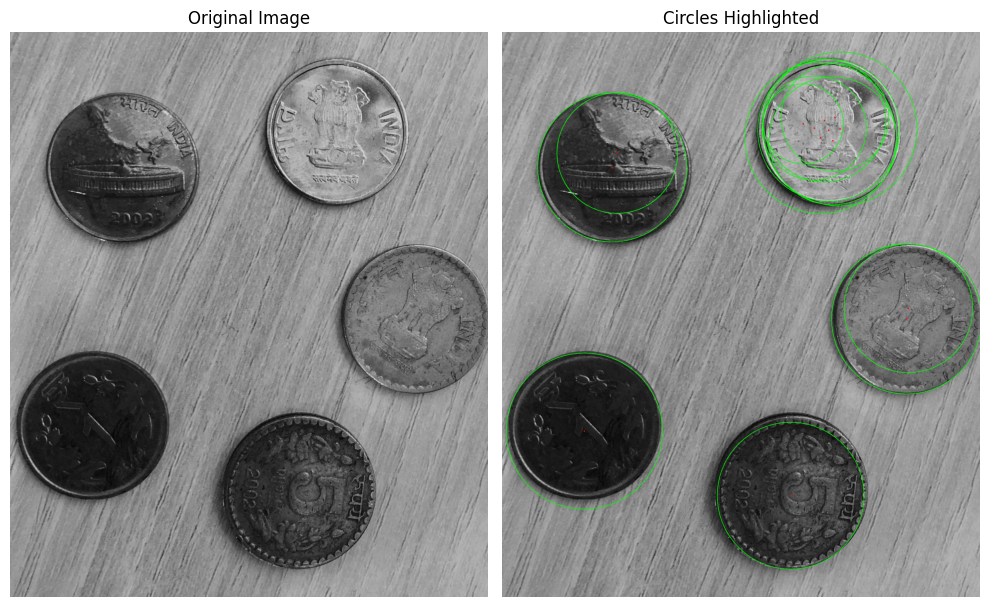

True

In [13]:
coin_image = cv2.imread('../images/coins.jpg')
circle_image = detect_circles(coin_image)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(coin_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(circle_image, cv2.COLOR_BGR2RGB))
plt.title("Circles Highlighted")
plt.axis("off")

plt.tight_layout()
plt.show()

cv2.imwrite('../images/circle_coins.png', line_image)

As we can see, the circles were detected. 

- 3.3 Now let us vary the detection parameters and see the use for each of them.

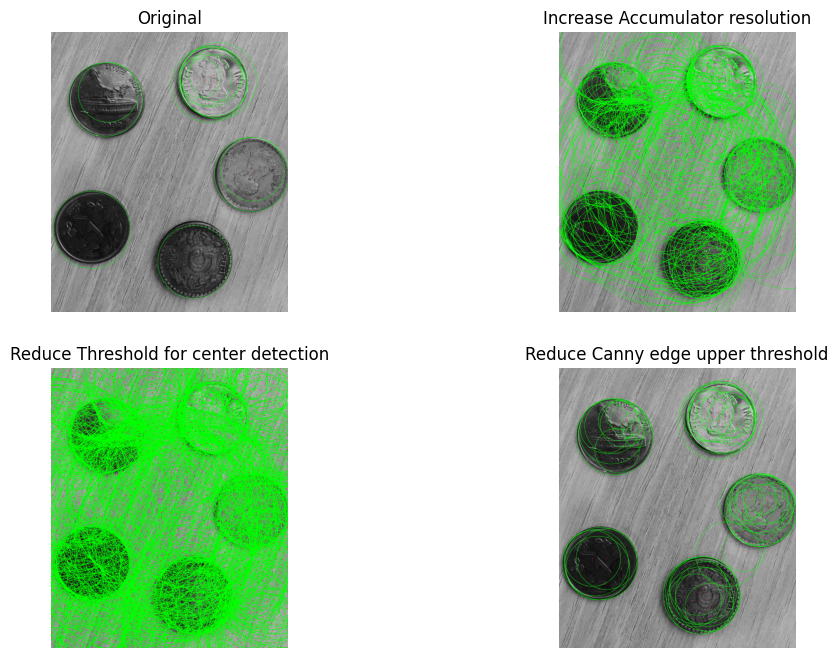

In [14]:
params = [(1.0, 100, 100), (1.4, 100, 100), (1.0, 100, 20), (1.0, 80, 100)]
titles = ['Original', 'Increase Accumulator resolution', 'Reduce Threshold for center detection', 'Reduce Canny edge upper threshold']

plt.figure(figsize=(12, 8))
for i, (dp, p1, p2) in enumerate(params):
    circle_image = detect_circles(coin_image, dp=dp, param1=p1, param2=p2)
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(circle_image, cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

- 3.3 

1. (Accumulator resolution): Affects the sensitivity of circle detection. Lower values result in more detections but require more computation.
2. (Canny edge upper threshold): Helps in detecting edges for circle detection Higher values result in fewer, more confident circle detections.
3. (Threshold for center detection): Higher values result in fewer, more confident circle detections.

### Task 4: Harris Corner Detection

- 4.1 Now we write a function which can detect Harris Corners.

In [15]:
def harris_corner_detection(image, block_size=2, ksize=3, k=0.04):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    gray = np.float32(gray)

    corners = cv2.cornerHarris(gray, block_size, ksize, k)

    corners = cv2.dilate(corners, None)

    threshold = 0.01 * corners.max()
    marked_image = image.copy()
    marked_image[corners > threshold] = [0, 0, 255] 

    return marked_image

- 4.2 Now let us apply this function to the grid image.

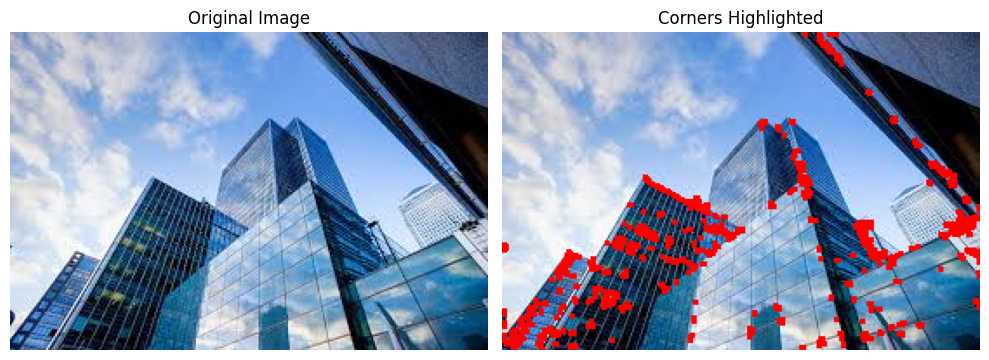

True

In [19]:
grid_image = cv2.imread('../images/building.png')
corner_image = harris_corner_detection(grid_image)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(grid_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.title("Corners Highlighted")
plt.axis("off")

plt.tight_layout()
plt.show()

cv2.imwrite('../images/corner_grid.png', corner_image)

As we can see, the coners are detected successfully.

- 4.3 Now let us vary the k parameter and observe how the detector varies.

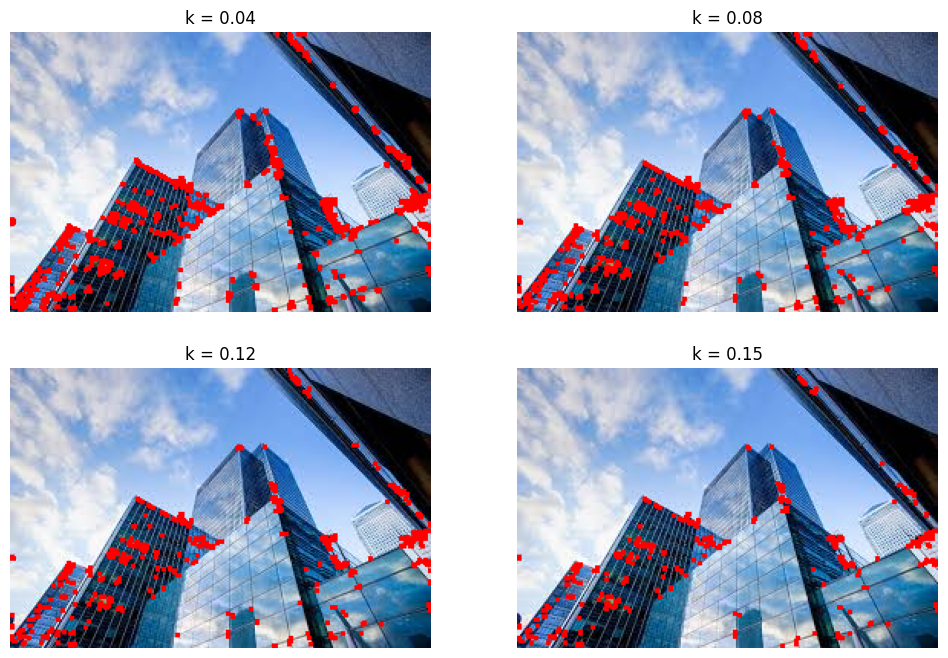

In [20]:
k_values=[0.04, 0.08, 0.12, 0.15]

plt.figure(figsize=(12, 8))
for i, k in enumerate(k_values):
    corner_image = harris_corner_detection(grid_image, k=k)
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
    plt.title(f'k = {k}')
    plt.axis('off')

1. Low 𝑘(e.g., 0.04): 
    - More sensitive to corner responses, detecting even weaker corners.
    - May introduce false positives (e.g., edges mistakenly identified as corners).


2. Medium 𝑘(e.g., 0.08):
    - Balanced sensitivity; identifies prominent corners with fewer false positives.
    - Typically the optimal setting for most applications.


3. High 𝑘(e.g., 0.15):
    - Focuses on very strong corners only.
    - May miss some valid corners, especially in subtle features.


### Task 5: Short Theory

The Hough Transform for lines and circles differs primarily in the parameter space and computational complexity. For lines, the transform maps points in the Cartesian space to a two-dimensional parameter space (
𝜌
,
𝜃)
where 
𝜌
is the perpendicular distance from the origin, and 
𝜃
is the angle of the line. Each point in the image votes for all potential lines passing through it, making the process relatively straightforward.

For circles, the parameter space increases to three dimensions (
𝑎
,
𝑏
,
𝑟)
where 
𝑎
and 
𝑏
are the center coordinates, and 
𝑟
is the radius. Each edge point must vote for all possible circle centers and radii, significantly increasing computational complexity. Detecting circles often requires additional preprocessing, like radius constraints or Gaussian smoothing, to reduce false positives. Overall, circle detection is more resource-intensive due to its higher-dimensional parameter space.